### To-Do
- [ ] Try resnet50
- [ ] The other arabic mnist 

In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
# bs = 64
bs = 128

In [5]:
data = Path.cwd()/'Arabic/train'

In [6]:
len(data.ls())

60002

In [7]:
fnames = get_image_files(data) # get a list of images in the directory
fnames[:5]

[PosixPath('/media/kelwa/DEV/Code/DL/course-v3/nbs/dl1/Arabic/train/writer001_pass01_digit0.bmp'),
 PosixPath('/media/kelwa/DEV/Code/DL/course-v3/nbs/dl1/Arabic/train/writer001_pass01_digit1.bmp'),
 PosixPath('/media/kelwa/DEV/Code/DL/course-v3/nbs/dl1/Arabic/train/writer001_pass01_digit2.bmp'),
 PosixPath('/media/kelwa/DEV/Code/DL/course-v3/nbs/dl1/Arabic/train/writer001_pass01_digit4.bmp'),
 PosixPath('/media/kelwa/DEV/Code/DL/course-v3/nbs/dl1/Arabic/train/writer001_pass01_digit5.bmp')]

In [8]:
ds_tfms = get_transforms(do_flip=False)

In [9]:
np.random.seed(2)
pat = r'digit([^/]+).bmp$'
regex = re.compile(pat)
mo = regex.search(str(fnames[1]))
print(mo)

<re.Match object; span=(73, 83), match='digit1.bmp'>


In [10]:
data = ImageDataBunch.from_name_re(data, fnames, pat, ds_tfms = ds_tfms, 
                                  size=28, bs=bs).normalize(imagenet_stats)

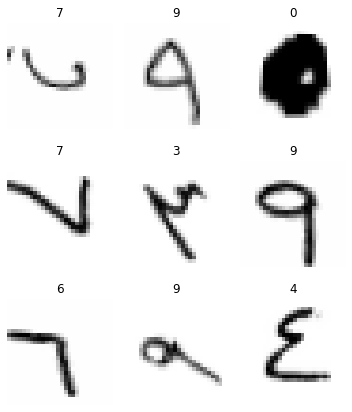

In [11]:
data.show_batch(rows=3, figsize=(5, 6))

In [12]:
print(data.classes)
len(data.classes), data.c

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


(10, 10)

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.358174,0.181458,0.052250,01:00
1,0.134204,0.067319,0.018333,00:59
2,0.089614,0.046568,0.012917,01:02
3,0.072525,0.042378,0.012083,01:03


In [15]:
learn.save('stage-1')

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

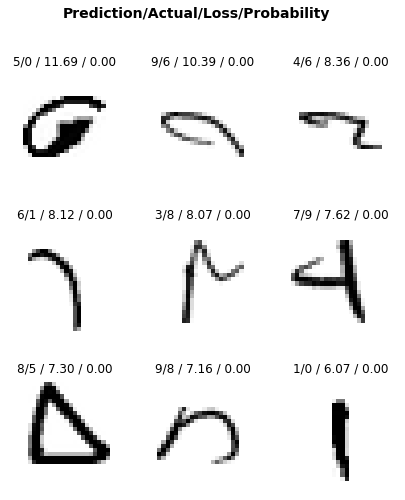

In [19]:
interp.plot_top_losses(9, figsize=(7, 8))

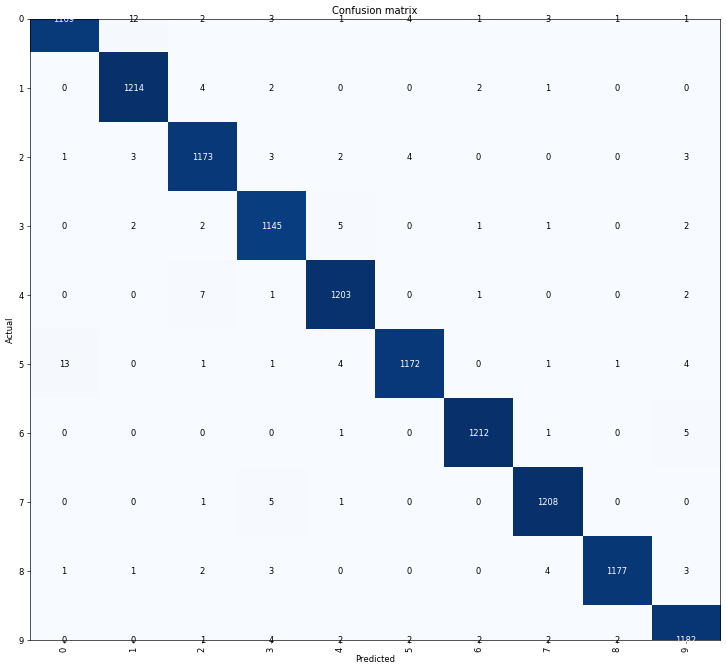

In [20]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [21]:
interp.most_confused(min_val=4)

[('5', '0', 13),
 ('0', '1', 12),
 ('4', '2', 7),
 ('3', '4', 5),
 ('6', '9', 5),
 ('7', '3', 5),
 ('0', '5', 4),
 ('1', '2', 4),
 ('2', '5', 4),
 ('5', '4', 4),
 ('5', '9', 4),
 ('8', '7', 4),
 ('9', '3', 4)]

In [14]:
learn.load('stage-1');

In [18]:
# unfreeze 
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.029311,0.012239,0.003833,00:58


In [19]:
learn.save('unfreeze-1')

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


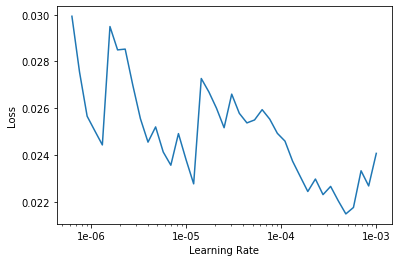

In [21]:
learn.recorder.plot()

In [22]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.023855,0.014291,0.004667,00:57
1,0.018827,0.011494,0.004000,00:59


In [23]:
learn.save('unfreeze-2')

In [26]:
learn.fit_one_cycle(2, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.018588,0.014747,0.003833,01:03
1,0.012385,0.014165,0.003583,00:58


In [27]:
learn.save('unfreeze-3')

In [29]:
learn.fit_one_cycle(4, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.014076,0.016043,0.004083,00:58
1,0.016140,0.014170,0.003583,01:04
2,0.012312,0.012057,0.003333,01:02
3,0.009764,0.012606,0.003417,01:04


In [30]:
learn.save('unfreeze-4')

### Testing 

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [14]:
test_data_path = Path.cwd()/'Arabic/test/'
print(len(test_data_path.ls()))
test_data_path.ls()[:5]

10000


[PosixPath('/media/kelwa/DEV/Code/DL/course-v3/nbs/dl1/Arabic/test/writer601_pass01_digit0.bmp'),
 PosixPath('/media/kelwa/DEV/Code/DL/course-v3/nbs/dl1/Arabic/test/writer601_pass01_digit1.bmp'),
 PosixPath('/media/kelwa/DEV/Code/DL/course-v3/nbs/dl1/Arabic/test/writer601_pass01_digit2.bmp'),
 PosixPath('/media/kelwa/DEV/Code/DL/course-v3/nbs/dl1/Arabic/test/writer601_pass01_digit3.bmp'),
 PosixPath('/media/kelwa/DEV/Code/DL/course-v3/nbs/dl1/Arabic/test/writer601_pass01_digit4.bmp')]

#### Same transfomations 

In [4]:
ds_tfms = get_transforms(do_flip=False)

In [5]:
fnames = get_image_files(test_data_path) # get a list of images in the directory
fnames[:5]

[PosixPath('/media/kelwa/DEV/Code/DL/course-v3/nbs/dl1/Arabic/test/writer601_pass01_digit0.bmp'),
 PosixPath('/media/kelwa/DEV/Code/DL/course-v3/nbs/dl1/Arabic/test/writer601_pass01_digit1.bmp'),
 PosixPath('/media/kelwa/DEV/Code/DL/course-v3/nbs/dl1/Arabic/test/writer601_pass01_digit2.bmp'),
 PosixPath('/media/kelwa/DEV/Code/DL/course-v3/nbs/dl1/Arabic/test/writer601_pass01_digit3.bmp'),
 PosixPath('/media/kelwa/DEV/Code/DL/course-v3/nbs/dl1/Arabic/test/writer601_pass01_digit4.bmp')]

In [6]:
np.random.seed(2)
pat = r'digit([^/]+).bmp$'
regex = re.compile(pat)
mo = regex.search(str(fnames[1]))
print(mo)

<re.Match object; span=(72, 82), match='digit1.bmp'>


In [7]:
bs = 128

In [8]:
test_data = ImageDataBunch.from_name_re(test_data_path, fnames, pat, ds_tfms = ds_tfms, 
                                  size=28, bs=bs//2,
                                       test='test',
                                       valid_pct=0).normalize(imagenet_stats)

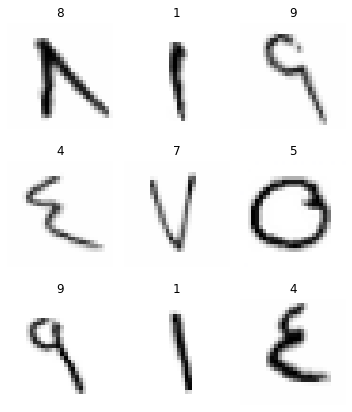

In [9]:
test_data.show_batch(rows=3, figsize=(5, 6))

In [10]:
learn = load_learner(Path.cwd()/'Arabic/')

In [11]:
loss, acc = learn.validate(test_data.train_dl)

In [24]:
print(f'Test loss: {loss}')
print(f'Test Accuracy: {1-acc}')

Test loss: 0.008126767352223396
Test Accuracy: 0.9974820017814636


In [19]:
# make a prediction
img = open_image(test_data_path/'writer601_pass01_digit5.bmp')
img

In [20]:
c, id, outputs = learn.predict(img); c

Category 5

In [21]:
img = open_image(test_data_path/'writer601_pass01_digit0.bmp')
img

In [22]:
c, id, outputs = learn.predict(img); c

Category 0